In [1]:
%matplotlib notebook

from IPython.display import display_html 

from tools import Preprocessing, Clustering, benchClustering, plotBarh

import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import hdbscan

from scipy.cluster import hierarchy


from fancyimpute import KNN
from fancyimpute import MICE
from fancyimpute.bayesian_ridge_regression import BayesianRidgeRegression

import matplotlib as mpl
import matplotlib.pyplot as plt
import bqplot as bqp
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import ipyvolume as ipv
from ipywidgets import FloatSlider, ColorPicker, VBox, jslink


sns.set(context='notebook', style='whitegrid', font='sans-serif',
        palette='muted', font_scale=1, color_codes=True, rc=None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 10000)

Using TensorFlow backend.


In [31]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [34]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)),columns=['A','B','C','D',])
df2 = pd.DataFrame(np.arange(16).reshape((4,4)),columns=['A','B','C','D',])
display_side_by_side(df1,df2,df1)

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
,A,B,C,D
0,0,1,2,3


In [2]:
on_PC = 0
n_init = 10

In [3]:
# import the csv dataset as a pandas DataFrame
# df = pd.read_csv('data/full_data.csv')
#df.columns
# list(df.columns)

**Indirect effects** occur to industries in the backward­linked industries that supply the exporting firm. [Wayne P. Miller]

Il valore dei moltiplicatori d'impatto indiretto dipende da:
 - Sviluppo del settore petrolifero, che incide sulla disponibilità di suppliers specializzati
     - Produzione di petrolio (bdp)
     - Produzione di petrolio (bdp)/GDP(US$)? In realtà, ciò che ci interessa è il valore assoluto della produzione, non relativo alla ricchezza totale del paese.
     - Numero di siti di estrazione?
 - Sviluppo industriale di un paese. (I suppliers avranno bisogno di materie prime, lavorazioni di vario genere, trasporti etc.)
 - Livello di importazione: più un paese è propenso all'importazione, meno la spesa dei suppliers sarà rivolta internamente al paese.


In [4]:
varlist = [
    'Production_Oil_bpd_2016',
    'ImportGoodsServices_%GDP',
#    'MVApc_constantUS$_2015',
    'MVAsh%_2015',
#   'Production_Oil_bpd_2014',
#   'Production_Oil_bpd_2015',
#   'MHMVAsh%_2015',
          ]

In [5]:
prep = Preprocessing('data/full_data.csv',
                     varlist=varlist, verbose=False)
prep.exportCSV('data/cleaned_data_petroleum.csv', impute=True)

Imputing row 1/37 with 0 missing, elapsed time: 0.002


/home/lupol/dev/clustering-economies/tools.py:83: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  self.country_names = self.df['Country Name'].as_matrix()
/home/lupol/dev/clustering-economies/tools.py:84: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  df_numeric = self.df.select_dtypes(include=[np.float64]).as_matrix()


<IPython.core.display.Javascript object>


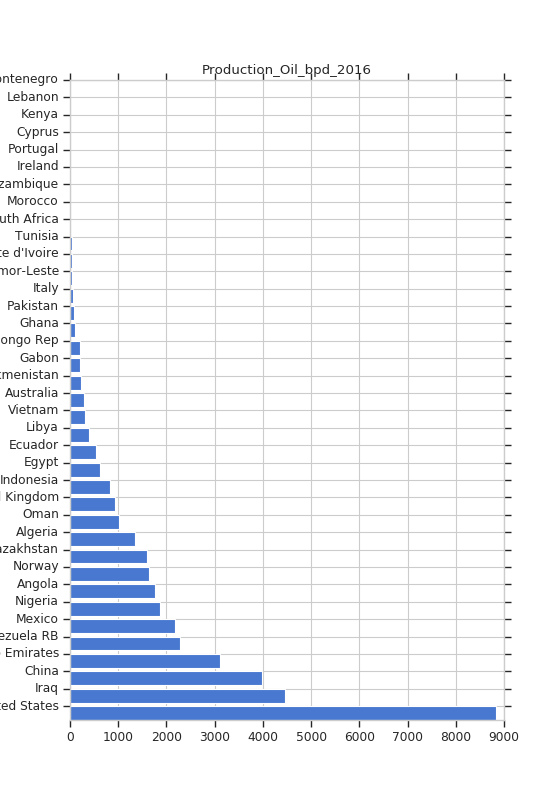

<IPython.core.display.Javascript object>


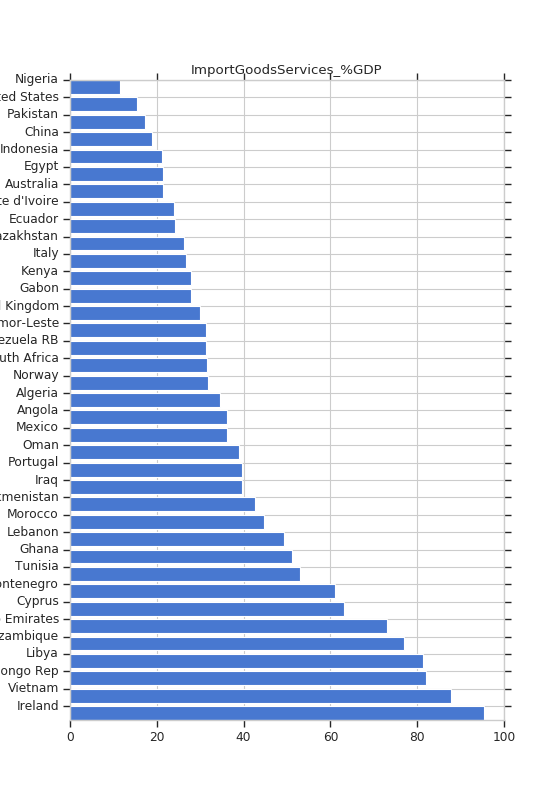

<IPython.core.display.Javascript object>


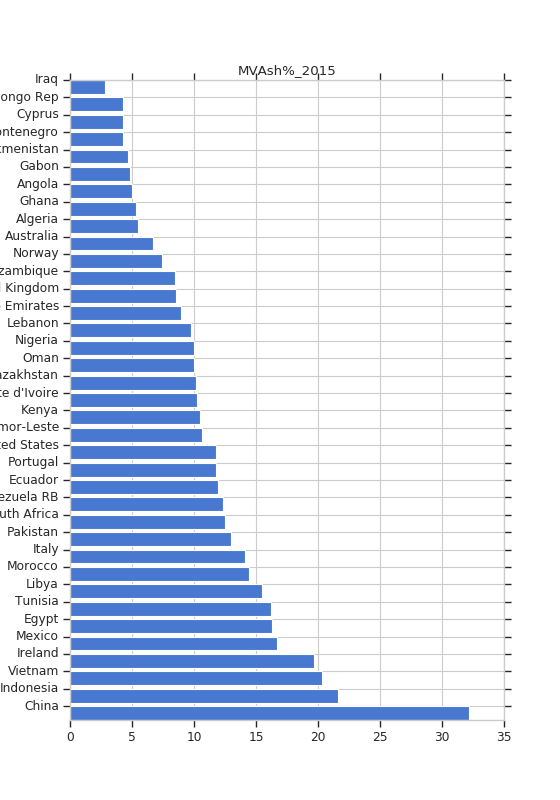

In [6]:
for c in prep.df.columns[1:]:
    plotBarh(df=prep.df, by_column=c )

The imported dataset as the following characteristics:
<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, DZA to VNM
Columns: 3 entries, Production_Oil_bpd_2016 to MVAsh%_2015
dtypes: float64(3)
memory usage: 1.2+ KB
None
CUMULATIVE PROPORTION OF VARIANCE EXPLAINED BY PCs


/home/lupol/dev/clustering-economies/tools.py:121: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  self.country_names = self.df['Country Name'].as_matrix()


<IPython.core.display.Javascript object>


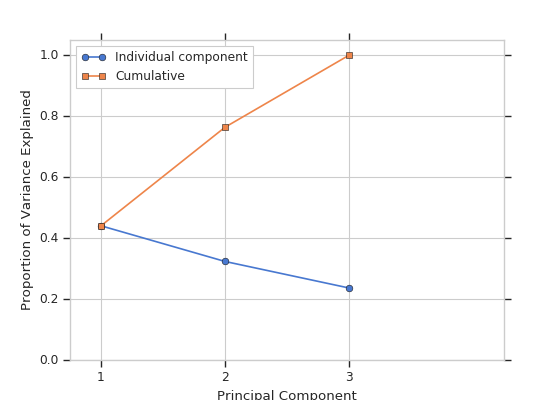

<IPython.core.display.Javascript object>


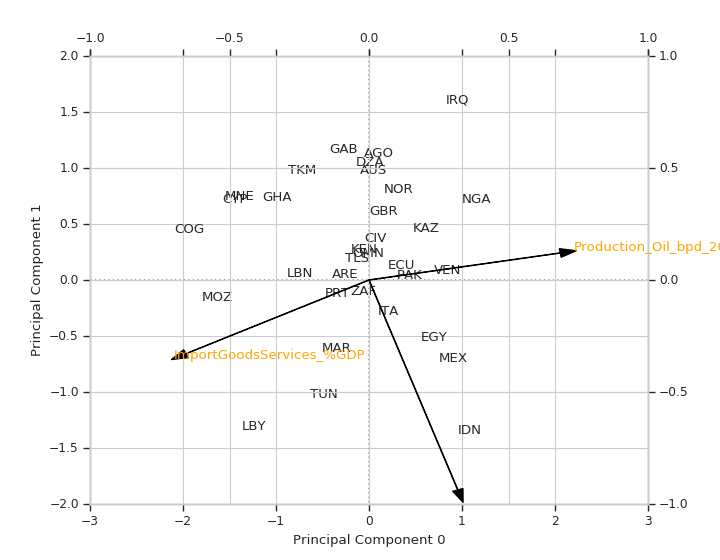

In [7]:
data = Clustering('data/cleaned_data_petroleum.csv')
data.getPC()
data.plotAlongPC(pc1=0, pc2=1, xlim=[-3, 3], ylim=[-2, 2])

In [8]:
x = data.df.iloc[:, 0]
y = data.df.iloc[:, 1]
z = data.df.iloc[:, 2]
print('x = ', x.name)
print('y = ', y.name)
print('z = ', z.name)

selected = None
ipv.figure()
scatter = ipv.pylab.scatter(x, y, z, marker="sphere", color = 'green', size=5, size_selected=8, selected=selected)
# ipv.pylab.xyzlabel(x.name, y.name, z.name)

size = FloatSlider(min=0, max=30, step=0.1)
size_selected = FloatSlider(min=0, max=30, step=0.1)
color = ColorPicker()
color_selected = ColorPicker()
jslink((scatter, 'size'), (size, 'value'))
jslink((scatter, 'size_selected'), (size_selected, 'value'))
jslink((scatter, 'color'), (color, 'value'))
jslink((scatter, 'color_selected'), (color_selected, 'value'))
VBox([ipv.gcc(), size, size_selected, color, color_selected])

x =  Production_Oil_bpd_2016
y =  ImportGoodsServices_%GDP
z =  MVAsh%_2015


<IPython.core.display.Javascript object>


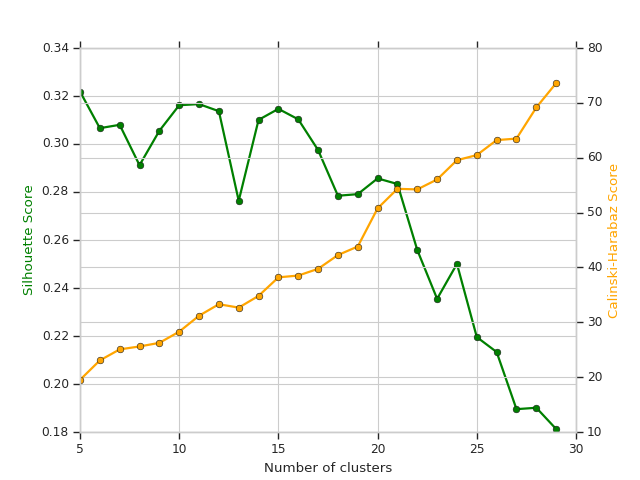

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [9]:
k_min = 5
k_max = 30
silh, calha = data.multipleKmeans(k_min=5, k_max=30, on_PC=0, n_init=n_init)

In [10]:
k_clusters = 10
data.kmeans(n_clusters=k_clusters, on_PC=on_PC)
# data.clusterings['kmeans'+str(n_clusters)]

the minimum BIC is achieved with               23 gaussian components


<IPython.core.display.Javascript object>


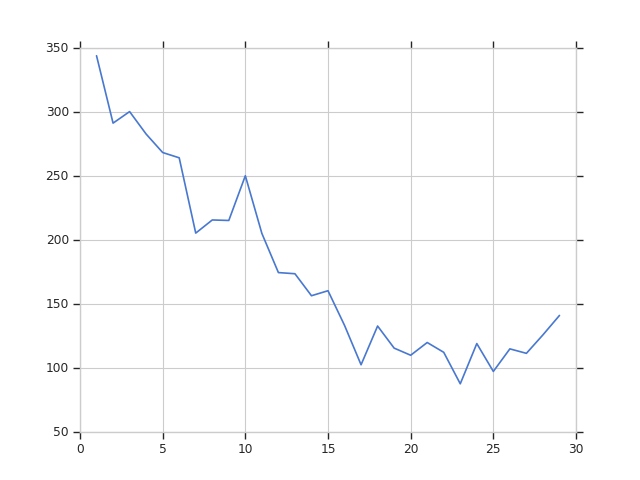

In [11]:
data.gmBIC(n_min=1, n_max=30, covariance_type='full', n_init=n_init, on_PC=on_PC)

In [12]:
n_components = 21
data.gaussianMixture(n_components, covariance_type='full', n_init=n_init, on_PC=0)
data.bayesianGaussianMixture(n_components, covariance_type='full', n_init=n_init, on_PC=0)

In [13]:
for cl in data.clusterings:
    print(cl)

gm21
bayesian gm21
kmeans10


Hierarchical clustering with euclidean distance metric.


<IPython.core.display.Javascript object>


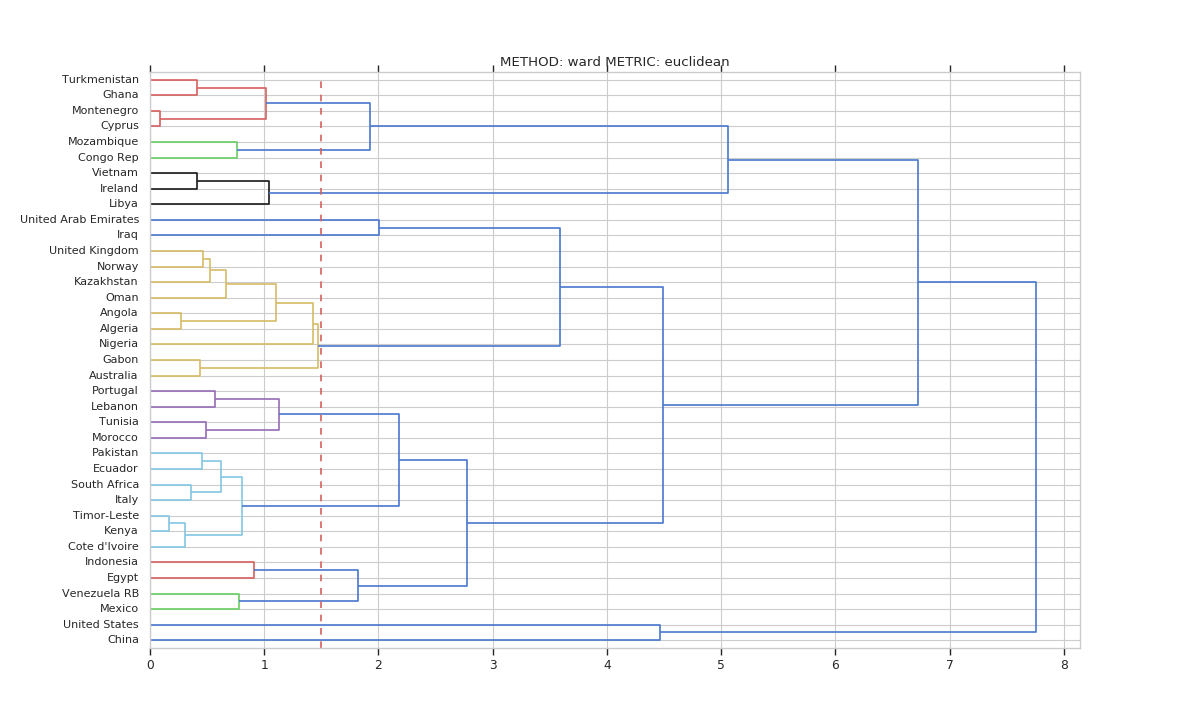

In [14]:
data.hierarchicalClustering(metric='euclidean', method='ward', threshold=1.5, on_PC=0, heatmap=False)

Hierarchical clustering with euclidean distance metric.


<IPython.core.display.Javascript object>


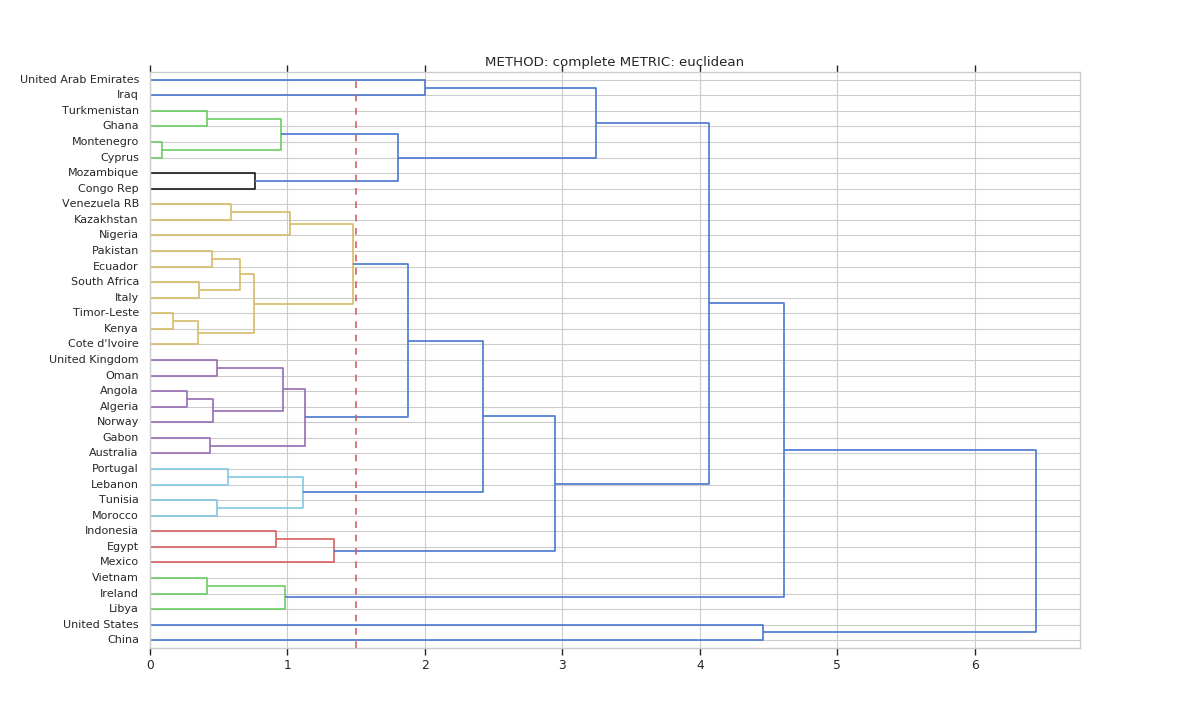

In [15]:
data.hierarchicalClustering(metric='euclidean', method='complete', threshold=1.5, on_PC=on_PC, heatmap=False)

In [41]:
data.clusterings.keys()

dict_keys([0, 'hierarchical_ward_euclidean', 'bayesian gm21', 'gm21', 'hierarchical_complete_euclidean', 'kmeans10'])

In [40]:
for n, k in enumerate(data.clusterings.keys()):
    print(k)
    print(n)


0
0
1
hierarchical_ward_euclidean
2
bayesian gm21
3
gm21
4
hierarchical_complete_euclidean
5
kmeans10


In [43]:
np.zeros(len(data.clusterings.keys()))

array([0., 0., 0., 0., 0., 0.])

In [46]:
data.clusterings['kmeans10']

,
Cluster,
0,"[Algeria, Angola, Australia, Gabon, Kazakhstan, Nigeria, Norway, Oman, Turkmenistan, United Kingdom]"
1,"[Lebanon, Morocco, Portugal, Tunisia]"
2,[Iraq]
3,"[Ireland, Libya, Vietnam]"
4,"[Egypt, Indonesia, Mexico, Venezuela RB]"
5,[United States]
6,"[Congo Rep, Cyprus, Ghana, Montenegro, Mozambique]"
7,"[Cote d'Ivoire, Ecuador, Italy, Kenya, Pakistan, South Africa, Timor-Leste]"
8,[China]


In [50]:
newdf = []
type(newdf)

list

In [57]:
data.clusterings.keys()

dict_keys(['hierarchical_ward_euclidean', 'bayesian gm21', 'gm21', 'hierarchical_complete_euclidean', 'kmeans10'])

In [72]:
newdf[0]['']

Cluster
1     [China]                                                                               
2     [United States]                                                                       
3     [Mexico, Venezuela RB]                                                                
4     [Egypt, Indonesia]                                                                    
5     [Cote d'Ivoire, Ecuador, Italy, Kenya, Pakistan, South Africa, Timor-Leste]           
6     [Lebanon, Morocco, Portugal, Tunisia]                                                 
7     [Algeria, Angola, Australia, Gabon, Kazakhstan, Nigeria, Norway, Oman, United Kingdom]
8     [Iraq]                                                                                
9     [United Arab Emirates]                                                                
10    [Ireland, Libya, Vietnam]                                                             
11    [Congo Rep, Mozambique]                                 

In [82]:
newdf[0].iloc[:, 0]

Cluster
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
Name: , dtype: float64

In [84]:
# newdf = np.zeros(len(data.clusterings.keys()))
newdf = []
for k in data.clusterings.keys():
    newdf.append(data.clusterings[k])
    data.clusterings[k].style.set_table_attributes("style='display:inline'").set_caption(k)
display_html(newdf[0]._repr_html_() + newdf[1]._repr_html_() + newdf[2]._repr_html_() + newdf[3]._repr_html_() + newdf[4]._repr_html_(), raw=True)

,
Cluster,
1,[China]
2,[United States]
3,"[Mexico, Venezuela RB]"
4,"[Egypt, Indonesia]"
5,"[Cote d'Ivoire, Ecuador, Italy, Kenya, Pakistan, South Africa, Timor-Leste]"
6,"[Lebanon, Morocco, Portugal, Tunisia]"
7,"[Algeria, Angola, Australia, Gabon, Kazakhstan, Nigeria, Norway, Oman, United Kingdom]"
8,[Iraq]
9,[United Arab Emirates]


In [63]:
len(newdf)

5

In [38]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)),columns=['A','B','C','D',])
df2 = pd.DataFrame(np.arange(16).reshape((4,4)),columns=['A','B','C','D',])

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Table 1')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Table 2')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

df1_styler = df1.style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Caption table 1')
df2_styler = df2.style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Caption table 2')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [16]:
# data.hdbscan(min_cluster_size=2, on_PC=0)
# data.clusterings['hdbscan']